In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import random
#from collections import Counter
import matplotlib.pyplot as plt

In [61]:




df1 = pd.read_csv('#Brexit-10k-17-1d-tweets.csv')


df2 = pd.read_csv('#StopBrexit-6k-17-4d-tweets.csv')

df3 = pd.read_csv('#VoteLeave-2k-18-1d-tweets.csv')


In [20]:
df1 = df1.sample(2000)
df2 = df2.sample(2000)

In [23]:
df1 = df1.iloc[:, 1:]
df2 = df2.iloc[:, 1:]

In [201]:
dataset = pd.concat([df1, df2, df3], axis = 0, sort = False)
dataset = dataset[['user_name', 'hashtags', 'Text']]

In [202]:
dataset.index = range(6000)

In [203]:
dataset

,user_name,hashtags,Text
0,Happy_days72,#tossers #brexit #NoConfidenceVote #MayMustGo,Anyone think @SkyNews are becoming desperate a...
1,mvonbraithwaite,#brexit,Listening to @DocLab panel on why illiberalist...
2,jardtech,#MundellMustGo #Brexit #indyref2 #Brexitchaos,#MundellMustGo has more skeletons in his cupbo...
3,SaundersRichie,#brexit #brexit,#brexit is the outcome not the driver. Before ...
4,roddytherobot,#Democracy #Brexit #WTO,You have the intellect that 17.4 MILLION voter...
...,...,...,...
5995,TruthRaiderHQ,#MondayMotivation #VoteLeave #Brexit #EUref #L...,"#MondayMotivation Britain, we are waiting for ..."
5996,chrisbradberry,#VoteLeave,This is officially #VoteLeave week for me. I c...
5997,ANelmes123,#Remain #VoteLeave #Brexit,#Remain is impossible. #VoteLeave #Brexit
5998,interdico30,#johnoliver #eu #voteleave #brexit,#johnoliver wow so much propaganda the #eu is ...


In [33]:
dataset.to_csv("small_merged_data.csv")

In [34]:
len(dataset)

6000

In [35]:
na_hash = []
dataset.index = range(len(dataset))
for i in range(len(dataset)):
    string = dataset.hashtags.loc[i]
    if isinstance(string, float):
        na_hash.append(i)
dataset = dataset.drop(na_hash)
dataset.index = range(len(dataset))

In [36]:
hash_list = []
for i in range(len(dataset)):
    string = dataset.hashtags[i]
    if string == '':
        hash_list.append([])
    else:
        hash_list.append(string.split(' '))
dataset['hash_list'] = hash_list

In [37]:
dataset.columns

Index(['user_name', 'hashtags', 'Text', 'hash_list'], dtype='object')

In [38]:
users = dataset.user_name.unique()

In [39]:
print("# of users ", len(users))
print("# of tweets", len(dataset))

# of users  3543
# of tweets 5996


In [40]:
hashtag_freq = dict()
hashtag_list = list()
for i in range(len(dataset)):
    for tag in dataset.hash_list[i]:
        tag = tag.lower()
        if tag not in hashtag_list:
            hashtag_list.append(tag)
            hashtag_freq[tag] = 1
        else:
            hashtag_freq[tag] += 1
#hashtag_list

In [41]:
len(hashtag_list)

1851

In [204]:
freq_table = pd.DataFrame([hashtag_freq.keys(), hashtag_freq.values()]).transpose()
freq_table.columns = ["hashtag", 'freq']

In [205]:
freq_table = freq_table.sort_values(by = 'freq', ascending = False)

In [206]:
freq_table.index = range(len(freq_table))

In [207]:
freq_table.head()

,hashtag,freq
0,#brexit,3018
1,#stopbrexit,2044
2,#voteleave,2020
3,#peoplesvote,1120
4,#fbpe,454


In [71]:
table = freq_table[3:13]

Text(0.5, 1.0, '10 hitting hashtags used in 11/2018')

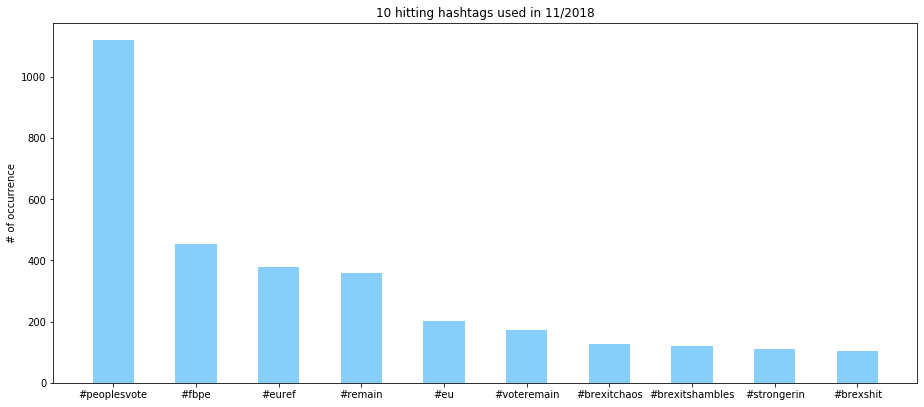

In [154]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(table.hashtag, table.freq, 0.5, color='lightskyblue', align='center', )
ax.set_ylabel('# of occurrence')
ax.set_title('10 hitting hashtags used in 11/2018')



In [209]:
freq_table[:13]

,hashtag,freq
0,#brexit,3018
1,#stopbrexit,2044
2,#voteleave,2020
3,#peoplesvote,1120
4,#fbpe,454
5,#euref,377
6,#remain,360
7,#eu,202
8,#voteremain,172
9,#brexitchaos,126


In [223]:
neutral = freq_table.iloc[[0, 5, 7, 3], 1].sum()
remain = freq_table.iloc[[1, 4, 6, 8, 9, 10, 11, 12], 1].sum()
leave = freq_table.iloc[[2], 1].sum()

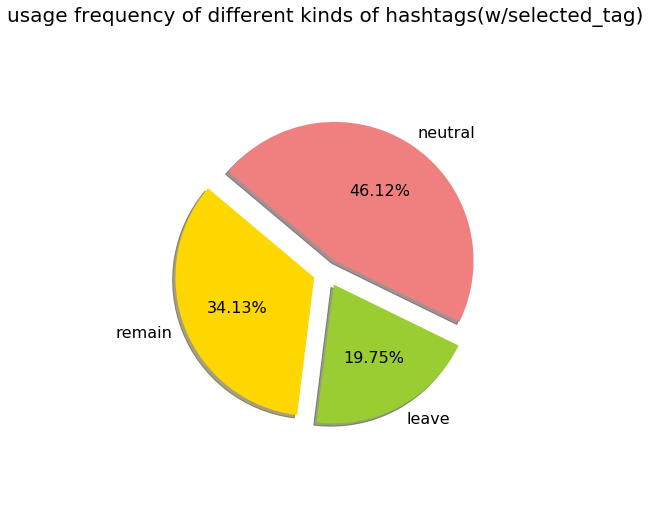

In [224]:
plt.figure(figsize=(6,9)) #size of the pie
labels = ['remain', 'leave', 'neutral'] # name of the labels
sizes = [remain, leave, neutral] # values
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1,0.1,0.1) # the gap
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.2f%%', shadow=True, startangle=140, textprops={'fontsize': 16})

plt.title('usage frequency of different kinds of hashtags(w/selected_tag)', size = 20)
plt.axis('equal')
plt.savefig('usage_frequency.png')
plt.show()

In [220]:
neutral = freq_table.iloc[[0, 5, 7, 3], 1].sum()-2000
remain = freq_table.iloc[[1, 4, 6, 8, 9, 10, 11, 12], 1].sum()-2000
leave = freq_table.iloc[[2], 1].sum()-2000

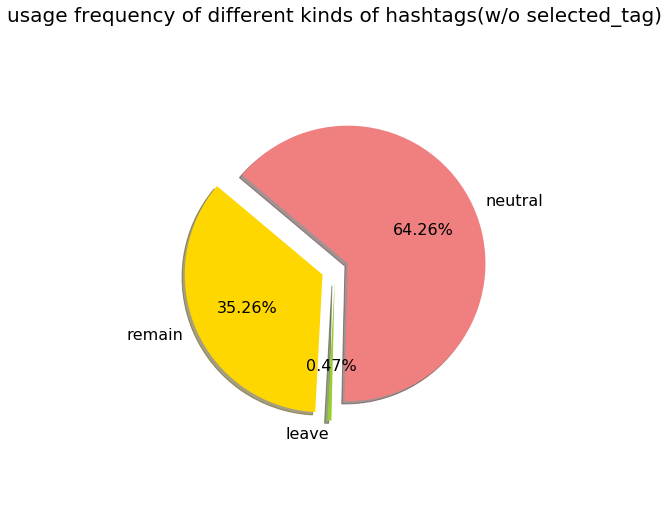

In [222]:
plt.figure(figsize=(6,9)) #size of the pie
labels = ['remain', 'leave', 'neutral'] # name of the labels
sizes = [remain, leave, neutral] # values
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1,0.1,0.1) # the gap
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.2f%%', shadow=True, startangle=140, textprops={'fontsize': 16})

plt.title('usage frequency of different kinds of hashtags(w/o selected_tag)', size = 20)
plt.axis('equal')
plt.savefig('usage_frequency_without.png')
plt.show()

In [62]:

df1 = df1.sample(1200)
df2 = df2.sample(1200)
df3 = df3.sample(1200)
df1 = df1.iloc[:, 1:]
df2 = df2.iloc[:, 1:]
dataset = pd.concat([df1, df2, df3], axis = 0, sort = False)
dataset = dataset[['user_name', 'hashtags', 'Text']]

In [63]:
dataset.index = range(len(dataset))
dataset

,user_name,hashtags,Text
0,montaillacman,#Brexit #BrexitChaos #LeaveMeansLeave #FBPE,#Brexit #BrexitChaos #LeaveMeansLeave #FBPE
1,ourkev,#IREvNZL #Brexit,Johnny Sexton could lift Britain out of the EU...
2,MichaelWil3,#nodeal #Brexit #Remoaners #Marsbars,"Wow, this really is something to worry about, ..."
3,bramsmets,#Brexit,"Looking at the #Brexit pantomime, I can only h..."
4,redhairedprince,#Brexit,"sorry, aber wenn die Merkel sagt, dass es auss..."
...,...,...,...
3595,AccountantPaul,#Brexit #Remain #Strongerin #VoteLeave,"The EU is NOT the top table, UNECE is. EEA get..."
3596,AtheistMayhem,#Brexit #EUref #VoteLeave,'#Brexit EARTHQUAKE': EU fatcats' fears as Swe...
3597,KeechA13,#VoteLeave #SaveEurope #Time4Change,"Down two over the weekend, despite the shamele..."
3598,Albion_Rover,#VoteLeave,"#VoteLeave Norway was lied to, we were lied to..."


In [64]:
users = dataset.user_name.unique()

In [65]:
import networkx as nx

G = nx.Graph()

In [66]:
for name in users:
    G.add_node(name)

In [67]:
na_hash = []
dataset.index = range(len(dataset))
for i in range(len(dataset)):
    string = dataset.hashtags.loc[i]
    if isinstance(string, float):
        na_hash.append(i)
dataset = dataset.drop(na_hash)
dataset.index = range(len(dataset))

In [68]:
hash_list = []
for i in range(len(dataset)):
    string = dataset.hashtags[i]
    if string == '':
        hash_list.append([])
    else:
        hash_list.append(string.split(' '))
dataset['hash_list'] = hash_list

In [69]:
dataset

,user_name,hashtags,Text,hash_list
0,montaillacman,#Brexit #BrexitChaos #LeaveMeansLeave #FBPE,#Brexit #BrexitChaos #LeaveMeansLeave #FBPE,"[#Brexit, #BrexitChaos, #LeaveMeansLeave, #FBPE]"
1,ourkev,#IREvNZL #Brexit,Johnny Sexton could lift Britain out of the EU...,"[#IREvNZL, #Brexit]"
2,MichaelWil3,#nodeal #Brexit #Remoaners #Marsbars,"Wow, this really is something to worry about, ...","[#nodeal, #Brexit, #Remoaners, #Marsbars]"
3,bramsmets,#Brexit,"Looking at the #Brexit pantomime, I can only h...",[#Brexit]
4,redhairedprince,#Brexit,"sorry, aber wenn die Merkel sagt, dass es auss...",[#Brexit]
...,...,...,...,...
3594,AccountantPaul,#Brexit #Remain #Strongerin #VoteLeave,"The EU is NOT the top table, UNECE is. EEA get...","[#Brexit, #Remain, #Strongerin, #VoteLeave]"
3595,AtheistMayhem,#Brexit #EUref #VoteLeave,'#Brexit EARTHQUAKE': EU fatcats' fears as Swe...,"[#Brexit, #EUref, #VoteLeave]"
3596,KeechA13,#VoteLeave #SaveEurope #Time4Change,"Down two over the weekend, despite the shamele...","[#VoteLeave, #SaveEurope, #Time4Change]"
3597,Albion_Rover,#VoteLeave,"#VoteLeave Norway was lied to, we were lied to...",[#VoteLeave]


In [70]:
user_tag = dict()
for name in users:
    tags = dataset[dataset.user_name == name].hash_list
    used_tags = list()
    for i in range(len(tags)):
        for hashtag in tags.iloc[i]:
            used_tags.append(hashtag.lower())

    user_tag[name] = list(set(used_tags))

In [71]:
for i in range(len(users)):
    print(users[i])
    for j in range(i+1, len(users)):

        total_tags = set(user_tag[users[i]] + user_tag[users[j]])
        shared_tags = list()
        for tag in user_tag[users[i]]:
            if tag in user_tag[users[j]]:
                shared_tags.append(tag)
        shared_tags = set(shared_tags)
        weight = len(shared_tags)/len(total_tags)
        G.add_weighted_edges_from([(users[i], users[j], weight)])

montaillacman
ourkev
MichaelWil3
bramsmets
redhairedprince
BobBentonSmith
FrDe2059
saj__azim
BrexitFoxy
michaelgreen01
Athena6931
n1artisan
Randombob18
avocet2
wlate17
LPrivileged
sybaritedavid
DrJennyRose
brexit_politics
GlenwayTim
Me93119225
stuface
DrippingOn
PhilipMarshall1
MariusWM
growlus
WorthingBrexit
truthrox
DKA_EU
RUTrainingToday
ChuckDalldorf
Studio_Europa
ItYuks
markhillary
CarolineFlint
mkarim
HelenMagi
Bergmann_Mat
DoctorAphobos
geof24
AAT_Lancashire
spencerhudson
fingalpimpernel
cgrahamburgess
RachelElgy
independent_ps
twomuch77
mgreenaw
BrexitLondon
ashic
Gordon1000
PALICE
allan_mumo
BelieveintheU
atkin_nigel44
SaundersRichie
RealHumptyB
tramsbottom1
AndreasHT
verityfigament
buybuydandavis
Spetmologer
ochalecho
Newtons_Laws
ThreeWomen_
UsedMensPants
4x4RoadRunner01
Paul63B
euroventure
vogelbeere
RobertJFBarnes1
aboosalik
logical4ever
PhilDanielMoore
dontbrexitfixit
mancbird
dancrawford85
Aggarwal_Anand
comedyhampstead
DrJMSmith
Keroppo
geopoliting
bigjintybarr
bobhughe

MarcinTomala
FinnNielsen
AdamTebble
tonebri
MarionVargaftig
Berean122
zelo_street
DPGwyther
Pug50
sxdoc
DuncanKeeling
WoodyClements
JosepEgypt
yvonneridley
UxbEconomist07
PaulIrwin16
chrismarshll
anthony8863
brexit_clock
snarkytoes
Fionafof
DickMackintosh
Minzoparade
qldlander
MikeJMustafa
imeldawannabe
sandyhogarth1
WeRThe48Percent
DeForis66
bodsbr
ManusWeed
cheinzle
Palayo
CLASSthinktank
Karl_Downey
LauraN2513
McGurkEamonn
wilkesliberty45
NickFox_FM
Unite_forEurope
jammcghee
RedPilledNPC
SuskuLondon
LiberalTory1
Formato21GRC
speakeezie
nicky_fisher
MadridEuropa
SamirKhan181
BuxtonJulia
Mateusz_Wiatr
EssenceBham
fitzjimi
Brexiteer30
chauffeur_dave
SupraAstute
RedBlueConnect
HeineGiessen
Christhefish86
monkbusiness
joshr
nerds_of_steel
StefaanMarkyze
powers_gael
bel_avocat
blaupaule
BrexitGame
AliceTobyBrant
sharon697
Roelandpaul
richmarr
steve_stringer
jonathansamuels
ElizabethBangs
NanaInThames
JUProctor
ScottLucas_EA
Galaverna_GB
woo_opinion
dfmulcahy
Trainwest
skydavidblevins
daves

HenryLizzie
Familist
janelang1961
RooBubba
PaulWhelan745
techno_row
PozzyWozzy
helenwalder
utterlybgroovy
CrazyCrazyRobot
Martin8Mostly
robertajane_U
currywuss
Aluna_mvp
ParisDaguerre
PengeWest
kiasazand
FirehorseP
policylaura
PaulvonMitchell
lostthings2
Johnc1508
Kepilo
KTRivoire
redalphababe
RemainOnly
ahmerwadee
declan_travers
bizzyant
OneStepBayond
Antmidd1
eamonn_bennett2
Jetworld
cathsard
TheAtlanticoNew
timharbour
WorrallMrs
muschifuss998
SusanHandley3
leeDav84
ukneedshelp
Paul_Chadderton
TheGreatRejoin
BonnieBoop
LeBethanie
mjharries2
VerityKalcev
CardinalBiggle2
KimSJ
BristolGJ
wilkes_nat
Superbusinesz
SeanLoki15
MisterBloggs
twangit16
nosheepzone
rachelsmith999
ChelsClive
BurtyBird
FParsonage
Steve_Hooker
N_Ainscow
C0mfortablyNum6
mishwoz
sazmeister88
LouisFarmer119
NHollinghurst
barbara_franchi
BocaVerite
anea194
VivecaKohPhotog
justinionn
CommonSenseOnEU
StopBrexitMarch
RoyMotteram
delyn48eu
51TJK
TheBlackShuck
PSI_TimEd
Ellybeee
lunaperla
MichaelJGollop
fatmalemodel
gr1pin

csiblonde
robryan_uk
spencer68
OfficialSaundra
_matjaz
Theodoros04
ChrisBaileyLdn
I_DontGiveADuck
will1362sky
JIMMYJ101
Paraietta
GeorgeSB02
BlueST955
Baz_Mattaz
lois_rogers
si5
CH_Gallois
VictorBravo648
PassionateDave
fleetstreetfox
alexsau1991
andreww1967
DrAaronEdwards
rburns
SebShearer
stuartstpaul
rjs2500
Brexit_Decision
PeterClutton
Paddynyorks1968
wallaceme
ToriaTowers
BWPLEVER
catt2280
markydeedrop
eScooteroo
AngryTed4
Raywoolford
TheAliceSmith
GrantStanleyUK
LesleyMillercyp
WWidiwici
Luke9320
thisisBREXIT
PG1701
Albion_Rover
JavaDevVictoria
FightThePower91
Nigel22222
beckbrady75
iharding51
vote_eu
robbiemac1969
vobes
andyrv1960
BeeAHoney_
ElsworthyMike
Smilebehappier
martinallen72
TelePolitics
mrmglloyd
harrycromack
scottamylola
robertraineyni
theoverrover
neopeitha
hushlaa
Freeas4bird
AlexSaint2
MrBen___
GODLivesInUs
WESmith91
TheBeeGuy0
bmwminihell
sammybarry09
TedYarbrough1
mcvoteleave
joabbess
LadyChou94
LCDK_UK
Glenndalmas
Alex_Scanlan
tinnie31
Postmanlondon
mary_fagan
Tb

In [72]:
G.number_of_edges()

2778903

In [49]:
dataset.to_csv('500.csv')

In [73]:
G.number_of_nodes()

2358

In [74]:
neutral_tag = ['#eu', '#peoplesvote', '#brexit']
remain_tag = ['#stopbrexit', '#fbpe', '#euref', '#remain', '#voteremain', '#brexitchaos', '#brexitshambles', '#strongerin', '#brexshit']
leave_tag = ['#voteleave']

color_label = list()
for user in users:
    color = 0
    for tag in user_tag[user]: 
        if tag in remain_tag:
            color += 1
        elif tag in leave_tag:
            color -= 1
    color_label.append(color)
print(Counter(color_label).keys()) # equals to list(set(words))
print(Counter(color_label).values() )# counts the elements' frequency

dict_keys([2, 0, 5, 4, 1, 3, -1, 6])
dict_values([132, 1053, 1, 4, 603, 25, 539, 1])


In [75]:
colors = list()
for i in range(len(color_label)):
    if color_label[i] > 0:
        colors.append('lightcoral')
    elif color_label[i] < 0:
        colors.append('lightskyblue')
    else:
        colors.append('yellowgreen')

In [56]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1142\nNumber of edges: 651511\nAverage degree: 1141.0000'

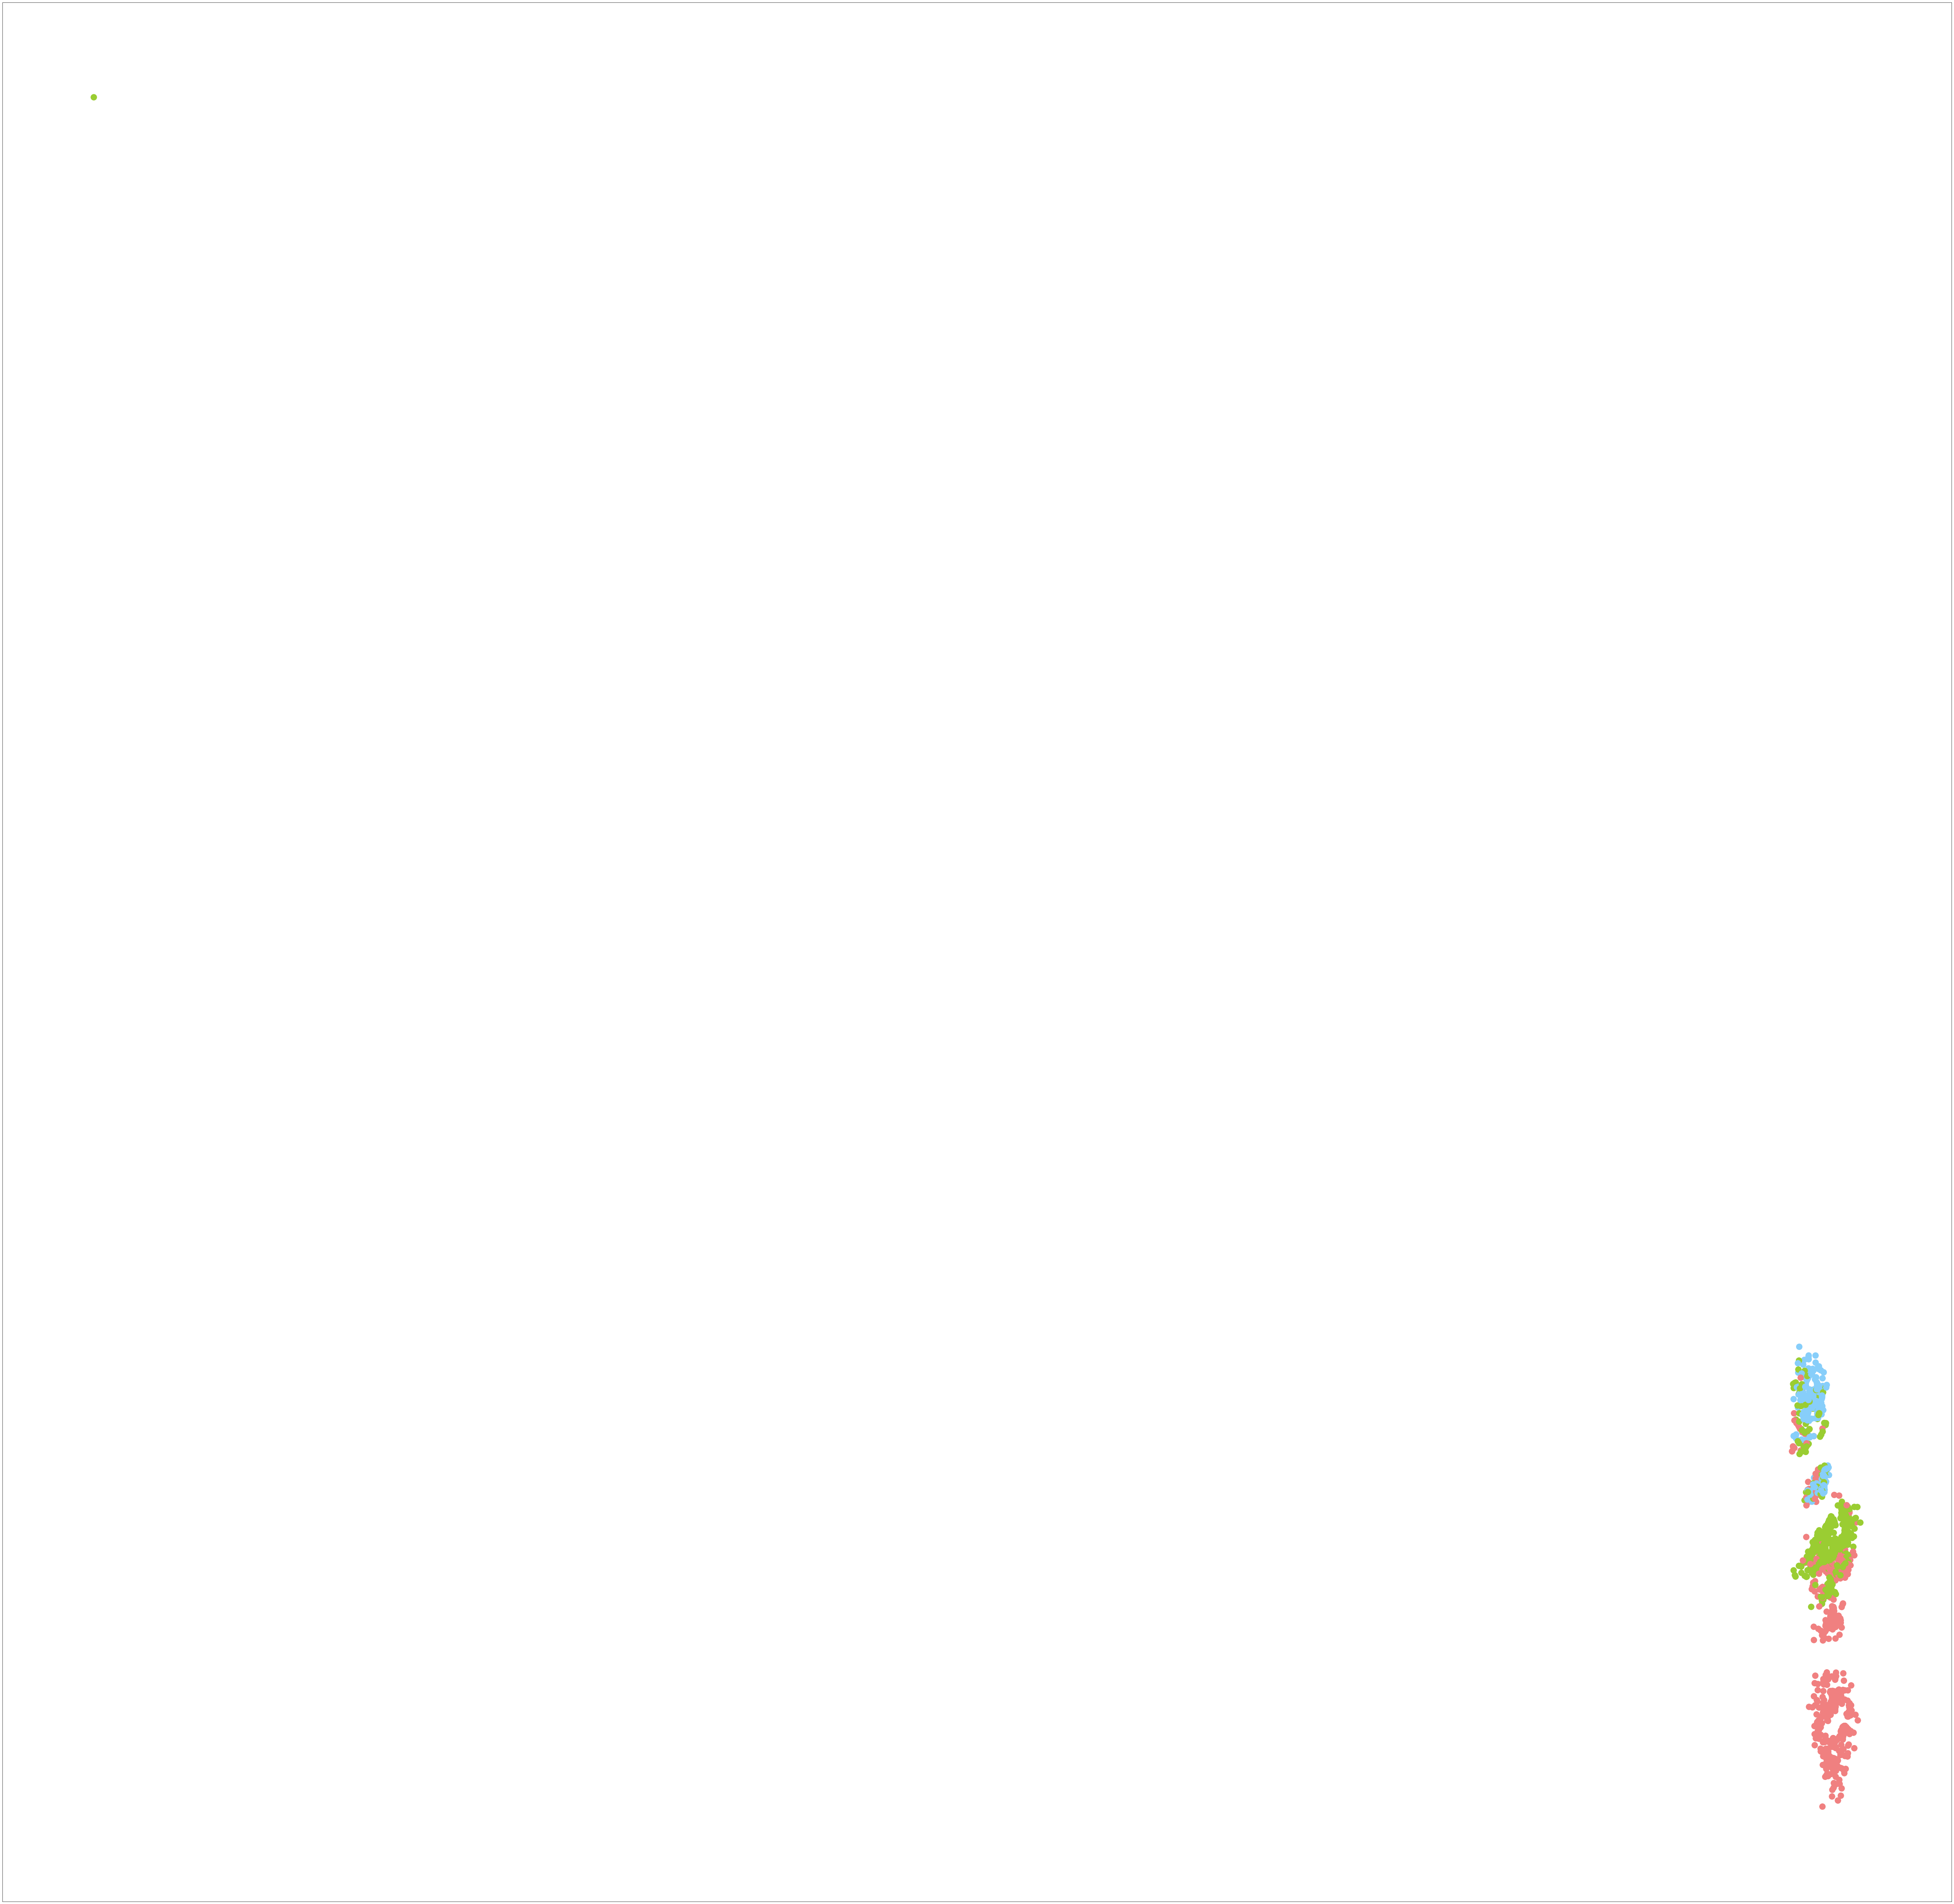

In [76]:
plt.figure(figsize=(100,100))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=colors, with_labels=False)
plt.show()

In [338]:
nx.write_weighted_edgelist(G, 'edge_list18.csv')

In [25]:
df_users = pd.DataFrame(users)
df_users.columns = ['Id']

In [28]:

pd.DataFrame(df_users).to_csv("user_list_nocolor.csv", index = False)

In [31]:
user_color = [users, colors]

In [32]:
user_color = pd.concat([pd.DataFrame(users), pd.DataFrame(colors)], axis = 1)

In [33]:
user_color.columns = ["user", 'color']

In [34]:
user_color

,user,color
0,CampbellLetters,yellowgreen
1,TomBeardshaw,yellowgreen
2,purpperil,yellowgreen
3,BlackCloud1966,lightcoral
4,aspexit,yellowgreen
...,...,...
1445,angelneptustar,lightskyblue
1446,Tanku99,lightskyblue
1447,PurestKino,lightskyblue
1448,mr_chambers_,lightcoral


In [35]:
user_color.to_csv("user_list_color.csv", index = False)